In [1]:
import zeal

In [15]:
from zeal.core import Player, Target, CombatAnalyser, Weapon

In [3]:
p = Player(expertise=14, ap=3200, weapon='torch', arm_pen=0)

In [4]:
p.expertise
p.dodge_chance
p.soc_proc_chance

14

0.03

0.4433333333333333

In [5]:
t = Target()
t.modified_armor


1715

In [6]:
c = CombatAnalyser(p, t)
c.final_armor
c.final_ap
c.phys_dmg_scale_factor
c.global_dmg_factor

1715

3500.0

0.8565217391304347

1.1136360000000003

In [7]:
c.autoattack_outcomes_factor
c.wf_factor
c.soc_proc_dmg_normal_hit
c.soc_proc_dmg
c.sob_proc_dmg
c.d_crusader_strike

1.2878350515463919

1.0960937886050304

1215.5805780756002

1627.9055101588438

780.1810213869304

1750.102598189915

In [8]:
c.get_naked_swing_dmg(wf=False)
c.get_naked_swing_dmg()

1722.390904562745

2088.6438871387036

In [9]:
c.get_soc_swing_dmg(wf=False)
c.get_soc_swing_dmg()

2401.4429284614935

2841.0290026050243

In [10]:
c.get_sob_swing_dmg(wf=False)
c.get_sob_swing_dmg()

2456.4632275857075

2965.126240828121

In [11]:
c.get_twist_dmg(wf=False)
c.get_twist_dmg()

3451.1908194617645

4202.163490761324

In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

expertises = np.linspace(0, 26, num=27)

# figs = []
# fig, axs = plt.subplots(2, 2, constrained_layout=True)

# counter_dict = {
#     1: [0, 0],
#     2: [0, 1],
#     3: [1, 0],
#     4: [1, 1],
# }

# plt.rcParams['axes.xmargin'] = 0
# plt.rcParams['axes.ymargin'] = 0

# counter = 1
# for armor in [6200, 7700]:
#     for weapon in ['twinblade', 'torch']:
#         ratios = []
#         t = Target(base_armor=armor)
#         for expertise in expertises:
#             p = Player(expertise=expertise, ap=3200, weapon=weapon)
#             c = CombatAnalyser(p, t)
#             ratios.append(c.get_sob_swing_dmg() / c.get_soc_swing_dmg())

# #         fig = plt.figure(figsize = (8, 5))
        
#         subplot = axs[counter_dict[counter][0], counter_dict[counter][1]]
#         subplot.plot(expertises, ratios)
#         subplot.set_title(f'{weapon}, boss armor={armor}')
#         subplot.grid(which='both')
# #         subplot.ylabel('Ratio')
# #         subplot.xlabel('Expertise')
        
# #         plt.savefig(f'{weapon}_swingratios_armor{armor}.png', facecolor='white', transparent=False)
#         counter += 1
    
# for ax in axs.flat:
#     ax.set(xlabel='Expertise', ylabel='sob/soc ratio')
#     ax.set_xlim(0,26)

# fig.suptitle('SoB/SoC swing damages vs expertise', fontsize=16)
# # fig.tight_layout()
# fig.set_size_inches(12.9, 8.5)
# fig.savefig('sob_vs_soc.png', facecolor='white', transparent=False)

Text(0.5, 1.0, 'twinblade, boss armor=6200')

[Text(0.5, 0, 'Expertise'), Text(0, 0.5, 'SoB+CS/twist ratio')]

(0.0, 26.0)

Text(0.5, 1.0, 'torch, boss armor=6200')

[Text(0.5, 0, 'Expertise'), Text(0, 0.5, 'SoB+CS/twist ratio')]

(0.0, 26.0)

Text(0.5, 1.0, 'twinblade, boss armor=7700')

[Text(0.5, 0, 'Expertise'), Text(0, 0.5, 'SoB+CS/twist ratio')]

(0.0, 26.0)

Text(0.5, 1.0, 'torch, boss armor=7700')

[Text(0.5, 0, 'Expertise'), Text(0, 0.5, 'SoB+CS/twist ratio')]

(0.0, 26.0)

[Text(0.5, 0, 'Expertise'), Text(0, 0.5, 'SoB+CS/twist ratio')]

(0.0, 26.0)

[Text(0.5, 0, 'Expertise'), Text(0, 0.5, 'SoB+CS/twist ratio')]

(0.0, 26.0)

[Text(0.5, 0, 'Expertise'), Text(0, 0.5, 'SoB+CS/twist ratio')]

(0.0, 26.0)

[Text(0.5, 0, 'Expertise'), Text(0, 0.5, 'SoB+CS/twist ratio')]

(0.0, 26.0)

Text(0.5, 0.98, 'SoB+CS / twist, as func of expertise')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


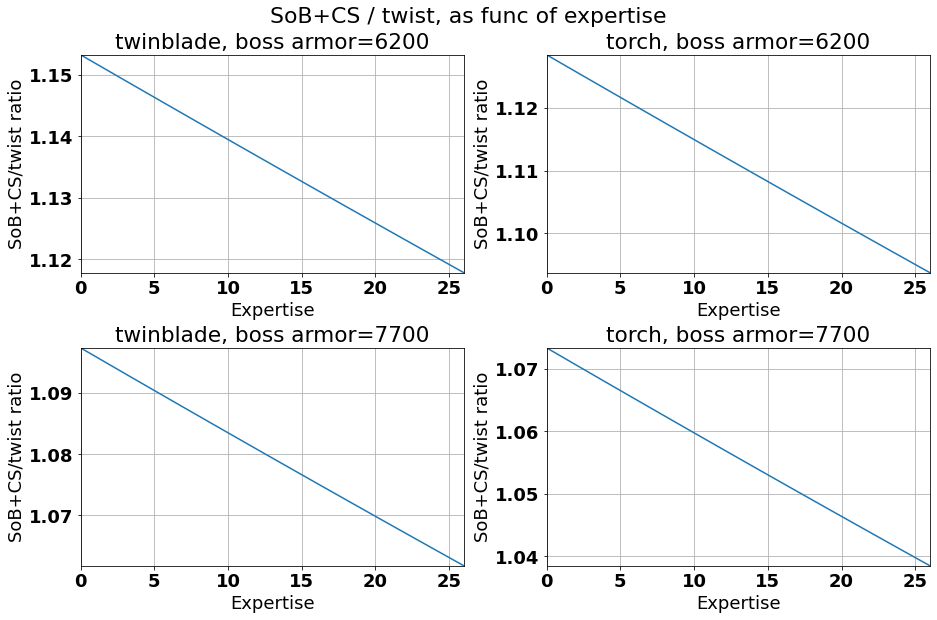

In [14]:
expertises = np.linspace(0, 26, num=27)

figs = []
fig, axs = plt.subplots(2, 2, constrained_layout=True)

counter_dict = {
    1: [0, 0],
    2: [0, 1],
    3: [1, 0],
    4: [1, 1],
}

plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}
matplotlib.rc('font', **font)

counter = 1
for armor in [6200, 7700]:
    for weapon in ['twinblade', 'torch']:
        ratios = []
        t = Target(base_armor=armor)
        for expertise in expertises:
            p = Player(expertise=expertise, ap=3200, weapon=weapon)
            c = CombatAnalyser(p, t)
            ratios.append((c.get_sob_swing_dmg() + c.get_cs_dmg()) / c.get_twist_dmg())

#         fig = plt.figure(figsize = (8, 5))
        
        subplot = axs[counter_dict[counter][0], counter_dict[counter][1]]
        subplot.plot(expertises, ratios)
        subplot.set_title(f'{weapon}, boss armor={armor}')
        subplot.grid(which='both')
        subplot.set(xlabel='Expertise', ylabel='SoB+CS/twist ratio')
        subplot.set_xlim(0,26)
#         subplot.savefig(f'{weapon}_swingratios_armor{armor}.png', facecolor='white', transparent=False)
#         subplot.ylabel('Ratio')
#         subplot.xlabel('Expertise')
        
#         plt.savefig(f'{weapon}_swingratios_armor{armor}.png', facecolor='white', transparent=False)
        counter += 1
    
for ax in axs.flat:
    ax.set(xlabel='Expertise', ylabel='SoB+CS/twist ratio')
    ax.set_xlim(0,26)

fig.suptitle('SoB+CS / twist, as func of expertise', fontsize=22)
fig.set_size_inches(12.9, 8.5)
fig.savefig('sobcs_vs_twist.png', facecolor='white', transparent=False)

[1.111946868628015, 1.1105815374797912, 1.1092181695910104, 1.1078567706130482, 1.106497346049962, 1.1051399012606344, 1.1037844414608868, 1.1024309717255634, 1.1010794969905857, 1.099730022054978, 1.0983825515828638, 1.0970370901054343, 1.0956936420228913, 1.094352211606359, 1.0930128029997723, 1.0916754202217358, 1.0903400671673602, 1.0890067476100687, 1.0876754652033818, 1.0863462234826753, 1.085019025866914, 1.0836938756603605, 1.0823707760542627, 1.081049730128513, 1.07973074085329, 1.0784138110906731, 1.0770989435962361]
[1.0540304184480251, 1.0526606051280172, 1.0512932408530042, 1.04992832740848, 1.0485658664573638, 1.0472058595420408, 1.045848308086372, 1.0444932133976734, 1.043140576668665, 1.0417903989793889, 1.0404426812991014, 1.039097424488133, 1.037754629299721, 1.036414296381816, 1.035076426278858, 1.0337410194335295, 1.0324080761884764, 1.0310775967880088, 1.0297495813797721, 1.0284240300163947, 1.0271009426571078, 1.0257803191693453, 1.0244621593303156, 1.023146462828

Text(0.5, 1.0, 'SoB+CS to twist dmg ratio, Torch vs final armor = 4790')

Text(0, 0.5, 'dmg ratio (SoB+CS/twist)')

Text(0.5, 0, 'Expertise')

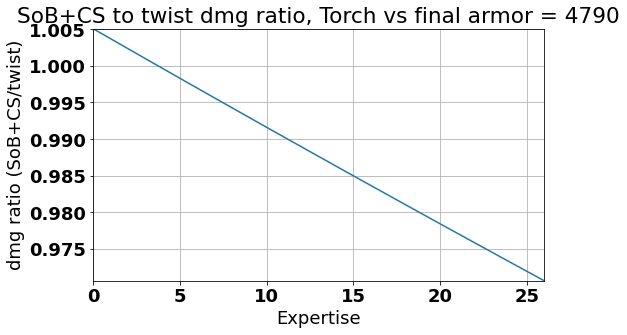

In [35]:
for armor in [6200, 7700, 8800]:
        ratios = []
        t = Target(base_armor=armor)
        t.affected_by_imp_ea = False
        for expertise in expertises:
            p = Player(expertise=expertise, ap=3200, weapon='torch')   #Weapon(speed=3.8, min_dmg=400, max_dmg=600))
            c = CombatAnalyser(p, t)
            ratios.append((c.get_sob_swing_dmg() + c.get_cs_dmg()) / c.get_twist_dmg())
        print(ratios)
        
fig = plt.figure(figsize = (8, 5))
plt.plot(expertises, ratios)
plt.grid()
plt.title(f'SoB+CS to twist dmg ratio, Torch vs final armor = {c.final_armor}')
plt.ylabel('dmg ratio (SoB+CS/twist)')
plt.xlabel('Expertise')
plt.tight_layout()
fig.savefig('VR_torch_ratios.png', facecolor='white', transparent=False)

In [36]:
c.final_armor

4790

In [37]:
dir(t)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'affected_by_coe',
 'affected_by_crusade',
 'affected_by_ff',
 'affected_by_imp_ea',
 'affected_by_jotc',
 'affected_by_sunder_armor',
 'base_armor',
 'bonus_ap_on_attacks',
 'bonus_holy_sp_on_attacks',
 'expose_weakness_agi',
 'global_dmg_factor',
 'modified_armor']

In [41]:
print(t.__dict__)

{'base_armor': 8800, 'affected_by_crusade': True, 'expose_weakness_agi': 1200, 'affected_by_imp_ea': False}


In [42]:
t.modified_armor

4790